In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
train_images.shape #(60000,28,28)
train_images[0].shape #(28,28)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape #10000
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
train_labels[0]

5

In [18]:
# The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers

In [20]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation= 'softmax'))

In [22]:
#Compilation
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
#Normalization
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [26]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [32]:
network.fit(train_images, train_labels, epochs=5, batch_size= 128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2560 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1030 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0677 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0491 - accuracy: 0.9855
Epoch 5/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0369 - accuracy: 0.9893


In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9792


In [35]:
network.predict(test_images)[0]

array([3.4061078e-09, 7.4281872e-11, 1.5950831e-06, 1.2440605e-05,
       6.0710152e-12, 1.3235120e-08, 1.0268245e-14, 9.9998510e-01,
       3.0718446e-08, 8.7906409e-07], dtype=float32)

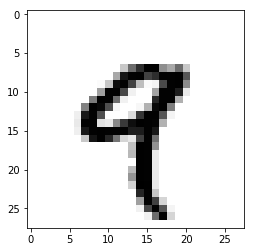

In [37]:
#display the fourth digit
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()